In [1]:
# lib standart
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('dataset_titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('dataset_titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender = pd.read_csv('dataset_titanic/gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# sklearn.ensemble.GradientBoostingClassifier

In [5]:
# lib standart
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk split data
from sklearn.model_selection import train_test_split

# Untuk Algoritma ML yang akan di pakai
from sklearn.ensemble import GradientBoostingClassifier

# untuk impute nilai kosong
from sklearn.impute import SimpleImputer

# untuk scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

# untuk one hot data kategorik
from sklearn.preprocessing import OneHotEncoder

# untuk PCA
from sklearn.decomposition import PCA

# untuk membangun pipeline ML
from sklearn.pipeline import Pipeline

# bagian dari pipe line untuk handling kolom 
from sklearn.compose import ColumnTransformer

# untuk tuning hyperparameter
from sklearn.model_selection import GridSearchCV

# menghitung nilai f1 and accuracy_score
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score, classification_report

# menyimpan model
import pickle

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analize train data

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
corre = train.corr().sort_values('Survived', ascending=False)[['Survived']]
corre

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19348\1581983084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre = train.corr().sort_values('Survived', ascending=False)[['Survived']]


,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


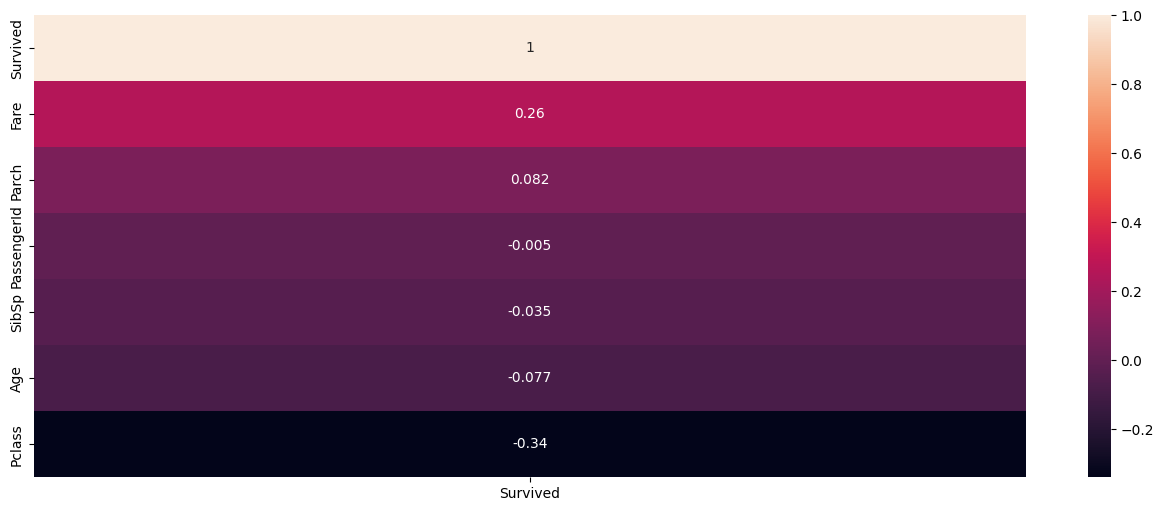

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(data=corre, annot=True)
plt.show()

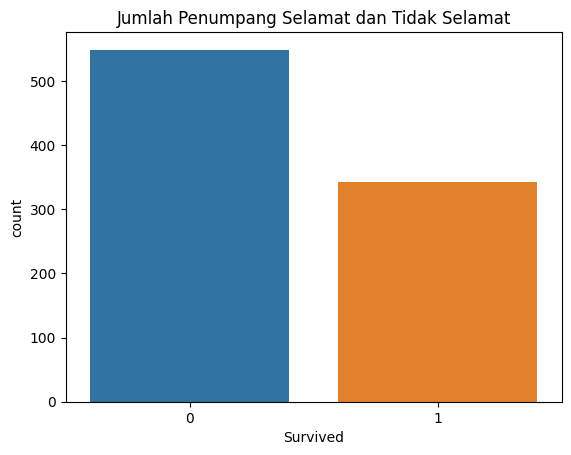

In [11]:
# Membuat visualisasi jumlah penumpang selamat dan tidak selamat
sns.countplot(data=train, x="Survived")
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.show()

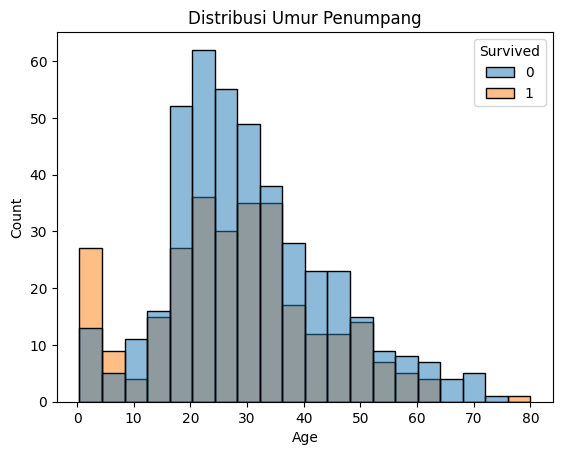

In [12]:
# Membuat visualisasi distribusi umur penumpang
sns.histplot(data=train, x="Age", bins=20, hue = 'Survived')
plt.title('Distribusi Umur Penumpang')
plt.show()

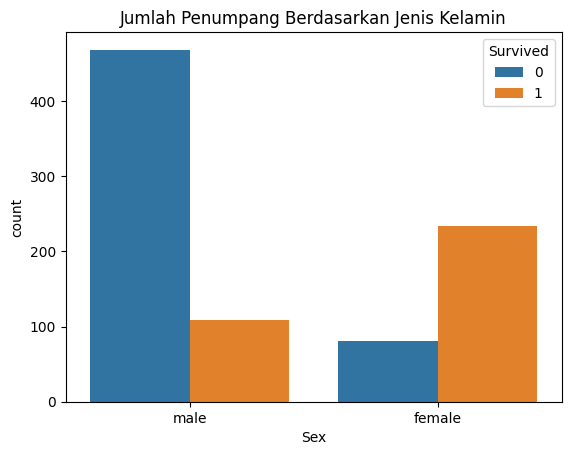

In [13]:
# Membuat visualisasi jumlah penumpang berdasarkan jenis kelamin
sns.countplot(data=train, x="Sex", hue = 'Survived' )
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.show()

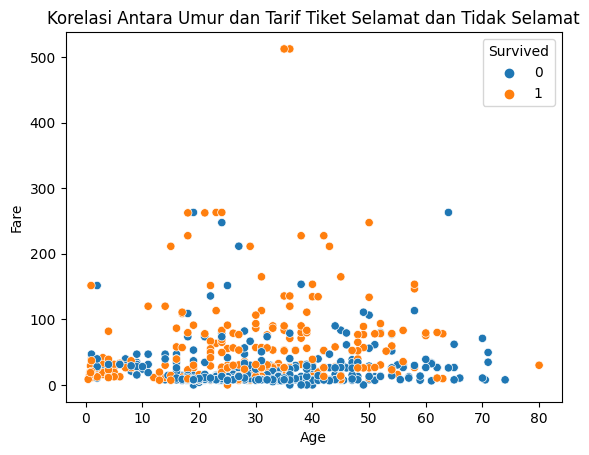

In [14]:
# Membuat visualisasi korelasi antara umur dan tarif tiket yang selamat dan tidak selamat
sns.scatterplot(data=train, x="Age", y="Fare", hue="Survived")
plt.title('Korelasi Antara Umur dan Tarif Tiket Selamat dan Tidak Selamat')
plt.show()

In [15]:
# Jika Wanita selamat dan semua anak anak selamat

def umur(x):
    if x <= 12:
        return "1"
    
    elif x >= 13 and x <= 18:
        return "2"
    
    elif x >= 19 and x <= 40:
        return "3"
    
    elif x >= 41 and x <= 65:
        return "4"    

    else:
        return "5"
    
train['umur'] = train['Age'].apply(lambda x : umur(x))

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,umur
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [16]:
train['WA'] = 0
train.loc[(train['umur'] == '1') | (train['Sex'] == 'female'), 'WA'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,umur,WA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [17]:
# Summary dari EDA kita
# 1.
# 2.
# 3.
# 4.

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,umur,WA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,5,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3,0


In [19]:
train['Title'] = train['Name'].str.split(', ').str.get(1).str.split('.').str.get(0).str.strip()

In [20]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Title'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,umur,WA
0,0,3,male,22.0,1,0,7.2500,S,3,0
1,1,1,female,38.0,1,0,71.2833,C,3,1
2,1,3,female,26.0,0,0,7.9250,S,3,1
3,1,1,female,35.0,1,0,53.1000,S,3,1
4,0,3,male,35.0,0,0,8.0500,S,3,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,3,0
887,1,1,female,19.0,0,0,30.0000,S,3,1
888,0,3,female,NaN,1,2,23.4500,S,5,1
889,1,1,male,26.0,0,0,30.0000,C,3,0


In [21]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,umur,WA
0,3,male,22.0,1,0,7.2500,S,3,0
1,1,female,38.0,1,0,71.2833,C,3,1
2,3,female,26.0,0,0,7.9250,S,3,1
3,1,female,35.0,1,0,53.1000,S,3,1
4,3,male,35.0,0,0,8.0500,S,3,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

In [24]:
# numerical_pipeline

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('poli', PolynomialFeatures(2)),
        ('scaler', RobustScaler())
    ])


list_numeric = [
                'Age', 
                'SibSp',     
                'Parch', 
                'Fare'
            ]

In [25]:
# categorical_pipeline

categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder())
    ])

list_categoric = ['Pclass', 'Sex', 'Embarked', 'umur', 'WA']

In [26]:
# preprocessor

preprocessor = ColumnTransformer([
        ('numeric', numerical_pipeline, list_numeric),
        ('categoric', categorical_pipeline, list_categoric)
    ])

In [27]:
model_GBC = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', GradientBoostingClassifier())
    ])

In [28]:
parameters = {
    'algoritma__n_estimators': [50, 200],
    'algoritma__max_depth': [3, 7],
    'algoritma__learning_rate': [0.01, 1],
    'algoritma__subsample': [0.5, 1.0]
}

model = GridSearchCV(model_GBC, parameters, cv = 5, scoring = 'f1')

In [29]:
%%time
model.fit(X_train, y_train)

CPU times: total: 51 s
Wall time: 1min 22s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('poli',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked',
                                                                          'umur',
                                                                          'WA'])])),
                                       ('algoritma',
                                        GradientBoostingClassifier())]),
             param_grid={'algoritma__learning_rate': [0.01, 1],
                         'algoritma__max_depth': [3, 7],
                         'algoritma__n_estimators': [50, 200],
                         'algoritma__subsample': [0.5, 1.0]},
             scoring='f1')

In [30]:
model.best_params_

{'algoritma__learning_rate': 0.01,
 'algoritma__max_depth': 7,
 'algoritma__n_estimators': 200,
 'algoritma__subsample': 0.5}

In [31]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritma__learning_rate,param_algoritma__max_depth,param_algoritma__n_estimators,param_algoritma__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,2.117341,0.151879,0.020861,0.007200,0.01,7,200,0.5,"{'algoritma__learning_rate': 0.01, 'algoritma_...",0.709677,0.747253,0.695652,0.784314,0.757895,0.738958,0.032303,1
3,1.008857,0.146931,0.016389,0.002943,0.01,3,200,1.0,"{'algoritma__learning_rate': 0.01, 'algoritma_...",0.752688,0.747253,0.704545,0.783505,0.705882,0.738775,0.030066,2
7,2.719927,0.233900,0.026267,0.006538,0.01,7,200,1.0,"{'algoritma__learning_rate': 0.01, 'algoritma_...",0.659574,0.765957,0.718447,0.787879,0.729167,0.732205,0.044074,3
5,0.646514,0.083215,0.026771,0.009675,0.01,7,50,1.0,"{'algoritma__learning_rate': 0.01, 'algoritma_...",0.666667,0.752688,0.723404,0.804124,0.696629,0.728702,0.047263,4
2,0.739861,0.123024,0.013553,0.002076,0.01,3,200,0.5,"{'algoritma__learning_rate': 0.01, 'algoritma_...",0.729167,0.719101,0.723404,0.752475,0.705882,0.726006,0.015297,5


In [32]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

# ALL Data

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

In [34]:
y_pred = model.predict(X)

df_pred = pd.DataFrame()
df_pred['y'] = y
df_pred['y_pred'] = y_pred

In [35]:
f1_score_model = f1_score(y, y_pred)
accuracy_score_model = accuracy_score(y, y_pred)
precision_score_model = precision_score(y, y_pred)
recall_score_model = recall_score(y, y_pred)

In [36]:
print('f1_score       : ' + str(f1_score_model) )
print('accuracy_score      : ' + str(accuracy_score_model) )
print('precision_score : ' + str(precision_score_model) )
print('recall_score    : ' + str(recall_score_model) )

f1_score       : 0.8850931677018634
accuracy_score      : 0.9169472502805837
precision_score : 0.9437086092715232
recall_score    : 0.8333333333333334


# Test Data

In [37]:
y_pred = model.predict(X_test)

df_pred = pd.DataFrame()
df_pred['y'] = y_test
df_pred['y_pred'] = y_pred

In [38]:
f1_score_model = f1_score(y_test, y_pred)
accuracy_score_model = accuracy_score(y_test, y_pred)
precision_score_model = precision_score(y_test, y_pred)
recall_score_model = recall_score(y_test, y_pred)

In [39]:
print('f1_score       : ' + str(f1_score_model) )
print('accuracy_score      : ' + str(accuracy_score_model) )
print('precision_score : ' + str(precision_score_model) )
print('recall_score    : ' + str(recall_score_model) )

f1_score       : 0.7664670658682636
accuracy_score      : 0.8544776119402985
precision_score : 0.8311688311688312
recall_score    : 0.7111111111111111
